# Flame Color Detection

### Name: Neha Ann Shygen

## Importing libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
%matplotlib inline
from tensorflow.keras import layers
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

Image Size:	(170, 297, 3)


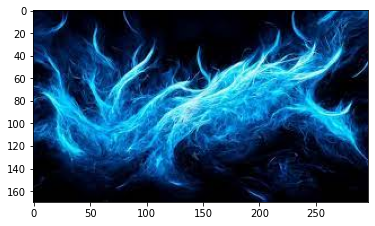

In [2]:
img1 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/blue/blue1.jpg")
print(f"Image Size:\t{img1.shape}")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

Image Size:	(194, 259, 3)


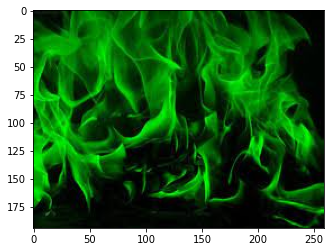

In [3]:
img2 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/green/green5.jpg")
print(f"Image Size:\t{img2.shape}")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

Image Size:	(225, 225, 3)


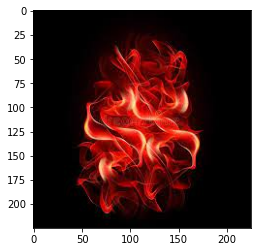

In [4]:
img3 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/red/red1.jpg")
print(f"Image Size:\t{img3.shape}")
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.show()

Image Size:	(268, 188, 3)


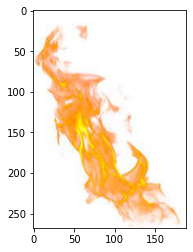

In [5]:
img4 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/orange/orange8.jpg")
print(f"Image Size:\t{img4.shape}")
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.show()

Image Size:	(168, 300, 3)


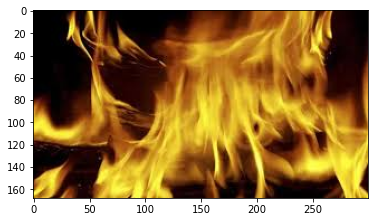

In [6]:
img5 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/yellow/yellow5.jpg")
print(f"Image Size:\t{img5.shape}")
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.show()

## Data Augmentation

In [7]:
trainDir = "D:/Neha/Neha.vit1/Flame_Color_Detection/training_data"
testDir = "D:/Neha/Neha.vit1/Flame_Color_Detection/testing_data"

In [8]:
trainGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                        
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split=0.15)

testGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.)

## Splitting data into training, validation and testing

In [9]:
trainData = trainGen.flow_from_directory(trainDir,
                                            target_size = (224, 224),
                                            class_mode = "categorical",
                                            batch_size = 32,
                                            subset = 'training')

valData = trainGen.flow_from_directory(trainDir,
                                            target_size = (224, 224),
                                            class_mode = "categorical",
                                            shuffle = False,
                                            batch_size = 32,
                                            subset = 'validation')

testData = testGen.flow_from_directory(testDir,
                                          target_size = (224, 224),
                                          class_mode = "categorical",
                                          shuffle = False,
                                          batch_size = 32)

Found 45 images belonging to 5 classes.
Found 5 images belonging to 5 classes.
Found 20 images belonging to 5 classes.


In [10]:
labelNamesTrain = list(trainData.class_indices.keys())
labelNamesTest = list(testData.class_indices.keys())
print(f"CLASSES AVAILABLE IN THE DATASET: {trainData.class_indices}\n")

import os
trainBlue = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/blue"))
print(f"Blue flame Images in Training Dataset: {trainBlue}")
trainGreen = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/green"))
print(f"Green flame Images in Training Dataset: {trainGreen}")
trainOrange = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/orange"))
print(f"Orange flame Images in Training Dataset: {trainOrange}")
trainRed = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/red"))
print(f"Red flame Images in Training Dataset: {trainRed}")
trainYellow = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/training_data/yellow"))
print(f"Yellow flame Images in Training Dataset: {trainYellow}")
testBlue = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/testing_data/blue"))
print(f"Blue flame Images in Testing Dataset: {testBlue}")
testGreen = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/testing_data/green"))
print(f"Green flame Images in Testing Dataset: {testGreen}")
testOrange = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/testing_data/orange"))
print(f"Orange flame Images in Testing Dataset: {testOrange}")
testRed = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/testing_data/red"))
print(f"Red flame Images in Testing Dataset: {testRed}")
testYellow = len(os.listdir("D:/Neha/Neha.vit1/Flame_Color_Detection/testing_data/yellow"))
print(f"Yellow flame Images in Testing Dataset: {testYellow}")


CLASSES AVAILABLE IN THE DATASET: {'blue': 0, 'green': 1, 'orange': 2, 'red': 3, 'yellow': 4}

Blue flame Images in Training Dataset: 10
Green flame Images in Training Dataset: 10
Orange flame Images in Training Dataset: 10
Red flame Images in Training Dataset: 10
Yellow flame Images in Training Dataset: 10
Blue flame Images in Testing Dataset: 4
Green flame Images in Testing Dataset: 4
Orange flame Images in Testing Dataset: 4
Red flame Images in Testing Dataset: 4
Yellow flame Images in Testing Dataset: 4


In [11]:
image, label = trainData.next()
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 5)


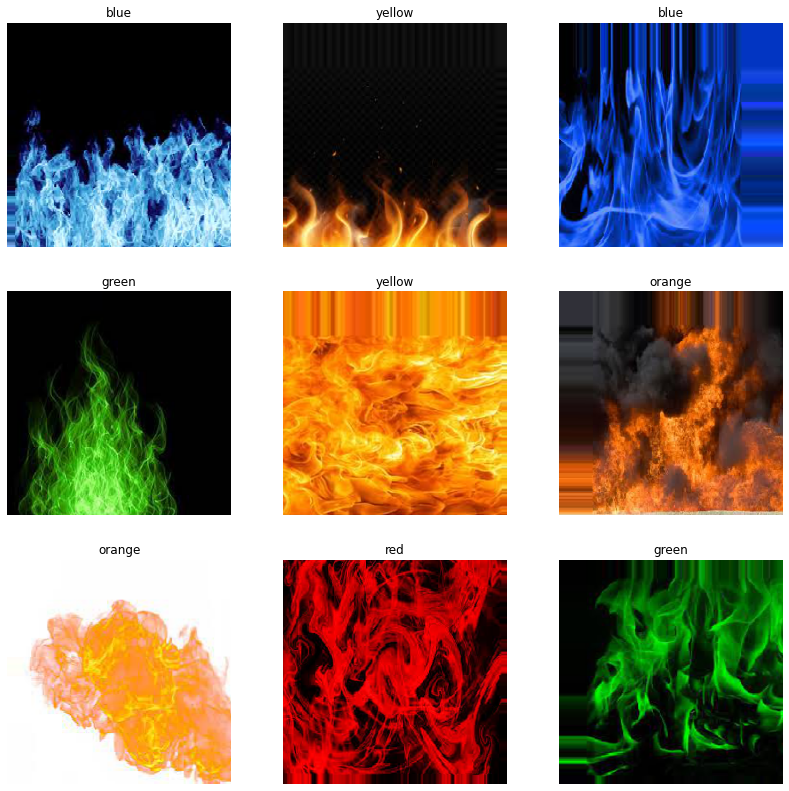

In [12]:
plt.figure(figsize=(14,14))

for i in range(9):
  image, label = trainData.next()
 
  plt.subplot(3,3,i+1)
  plt.imshow(image[i])
  plt.title(labelNamesTrain[tf.argmax(label[i])])
  plt.axis("off")
plt.show()

## CNN Model

In [13]:
#Building a Basic CNN Model

cnnModel = tf.keras.Sequential([
                             layers.Conv2D(filters=16, kernel_size=(4, 4), activation="relu", input_shape=(224,224,3)),                             
                             layers.Conv2D(filters= 16, kernel_size=(4, 4), activation="relu"),
                             layers.Dropout(0.1),
                             layers.MaxPooling2D(pool_size=2),
                             
                             layers.Conv2D(filters= 32, kernel_size=(3,3), activation="relu"),                             
                             layers.Conv2D(filters= 32, kernel_size=(3,3), activation="relu"),  
                             layers.Dropout(0.1),
                             layers.MaxPooling2D(pool_size=2),

                             layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),                             
                             layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
                             layers.Dropout(0.1),
                             layers.MaxPooling2D(pool_size=2),
                             layers.Flatten(),

                             layers.Dense(2048, activation="relu"),
                             layers.Dropout(0.2),
                             layers.Dense(1024, activation ="relu"),
                             layers.Dropout(0.4),
                             layers.Dense(1024, activation="relu"),

                             layers.Dense(5, activation="softmax")
                            
])

cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 221, 221, 16)      784       
                                                                 
 conv2d_1 (Conv2D)           (None, 218, 218, 16)      4112      
                                                                 
 dropout (Dropout)           (None, 218, 218, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 109, 109, 16)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 105, 105, 32)      9248      
                                                        

In [14]:
#Compiling the Model
cnnModel.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.00085),
    metrics = ["accuracy"]
)

In [16]:
#Fitting the data to the model
modelFit0 = cnnModel.fit(trainData,
          epochs = 30,
          steps_per_epoch = len(trainData),
          validation_data = valData,
          validation_steps = len(valData)
)

Epoch 1/30
2/2 [==============================] - 7s 2s/step - loss: 1.0686 - accuracy: 0.7333 - val_loss: 1.0129 - val_accuracy: 0.6000
Epoch 2/30
2/2 [==============================] - 7s 2s/step - loss: 0.8982 - accuracy: 0.6000 - val_loss: 0.6285 - val_accuracy: 1.0000
Epoch 3/30
2/2 [==============================] - 6s 4s/step - loss: 1.0544 - accuracy: 0.6889 - val_loss: 0.5075 - val_accuracy: 0.6000
Epoch 4/30
2/2 [==============================] - 6s 4s/step - loss: 1.2884 - accuracy: 0.5333 - val_loss: 0.4238 - val_accuracy: 0.8000
Epoch 5/30
2/2 [==============================] - 6s 2s/step - loss: 0.4427 - accuracy: 0.8444 - val_loss: 0.8328 - val_accuracy: 0.6000
Epoch 6/30
2/2 [==============================] - 6s 4s/step - loss: 0.7343 - accuracy: 0.6667 - val_loss: 0.4658 - val_accuracy: 0.8000
Epoch 7/30
2/2 [==============================] - 6s 2s/step - loss: 0.3993 - accuracy: 0.8222 - val_loss: 0.3193 - val_accuracy: 1.0000
Epoch 8/30
2/2 [=========================

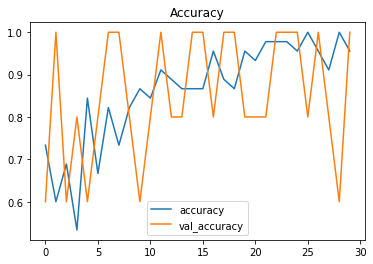

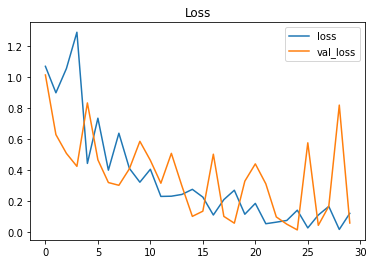

In [17]:
pd.DataFrame(modelFit0.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(modelFit0.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [18]:
baseModelEval = cnnModel.evaluate(testData)

1/1 [==============================] - 1s 846ms/step - loss: 0.1406 - accuracy: 0.9500


In [19]:
Y_pred = cnnModel.predict(testData)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testData.classes, y_pred))
print()
print('Classification Report')
target_names = ["blue","green","orange","red","yellow"]
print(classification_report(testData.classes, y_pred, target_names=target_names))

1/1 [==============================] - 1s 1s/step
Confusion Matrix
[[4 0 0 0 0]
 [1 3 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]

Classification Report
              precision    recall  f1-score   support

        blue       0.80      1.00      0.89         4
       green       1.00      0.75      0.86         4
      orange       1.00      1.00      1.00         4
         red       1.00      1.00      1.00         4
      yellow       1.00      1.00      1.00         4

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



Image Size:	(166, 304, 3)


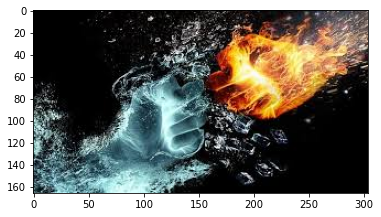

In [66]:
img1 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/test_imag1.jpg")
print(f"Image Size:\t{img1.shape}")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.show()

In [77]:
img1.resize((224, 224, 3))
img1 = np.expand_dims(img1, axis=0)/255.
Y_pred = cnnModel.predict(img1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print("Predicted class:",target_names[y_pred[0]])

1/1 [==============================] - 0s 129ms/step
[1]
Predicted class: green


Image Size:	(182, 277, 3)


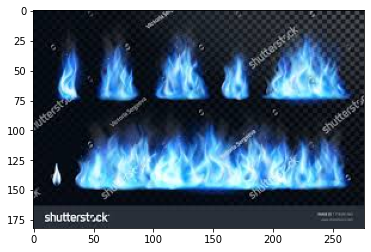

In [78]:
img2 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/test_imag2.jpg")
print(f"Image Size:\t{img2.shape}")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [83]:
img2.resize((224, 224, 3))
img2 = np.expand_dims(img2, axis=0)/255.
Y_pred = cnnModel.predict(img2)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print("Predicted class:",target_names[y_pred[0]])

1/1 [==============================] - 0s 119ms/step
[1]
Predicted class: green


## ResNet50

In [74]:
#Building a ResNet Model
from tensorflow.keras.applications import ResNet50V2
resnetBase = ResNet50V2(input_shape=(224,224, 3),
                        include_top=False,
                        weights=None,
                        pooling='max')
resnetBase.trainable = False
inputs = resnetBase.input
x = layers.Dense(256, activation='relu')(resnetBase.output)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(5, activation='softmax')(x)
resnetModel = tf.keras.Model(inputs, outputs)

In [75]:
#Compiling the Model
resnetModel.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
    metrics = ["accuracy"]
)

In [76]:
#Fitting the data to the model
modelFit = resnetModel.fit(
    trainData,
    epochs = 30,
    steps_per_epoch = len(trainData),
    validation_data = valData,
    validation_steps = len(valData)
)

Epoch 1/30
2/2 [==============================] - 12s 3s/step - loss: 1.6681 - accuracy: 0.2222 - val_loss: 1.8574 - val_accuracy: 0.2000
Epoch 2/30
2/2 [==============================] - 4s 3s/step - loss: 1.7306 - accuracy: 0.2000 - val_loss: 1.6293 - val_accuracy: 0.2000
Epoch 3/30
2/2 [==============================] - 4s 2s/step - loss: 1.6232 - accuracy: 0.2444 - val_loss: 1.5271 - val_accuracy: 0.4000
Epoch 4/30
2/2 [==============================] - 4s 3s/step - loss: 1.4705 - accuracy: 0.2667 - val_loss: 1.4817 - val_accuracy: 0.2000
Epoch 5/30
2/2 [==============================] - 5s 2s/step - loss: 1.4526 - accuracy: 0.2222 - val_loss: 1.3294 - val_accuracy: 0.8000
Epoch 6/30
2/2 [==============================] - 4s 1s/step - loss: 1.3026 - accuracy: 0.8222 - val_loss: 1.2578 - val_accuracy: 0.6000
Epoch 7/30
2/2 [==============================] - 4s 1s/step - loss: 1.2136 - accuracy: 0.6222 - val_loss: 1.1045 - val_accuracy: 0.4000
Epoch 8/30
2/2 [========================

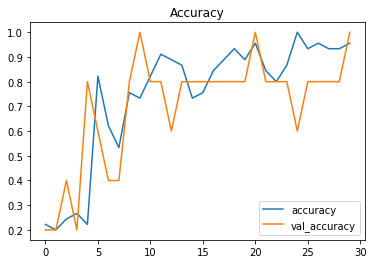

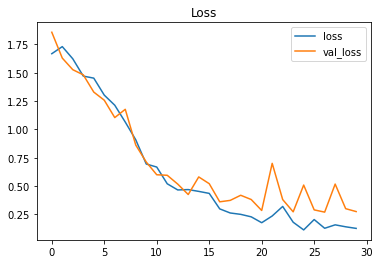

In [77]:
pd.DataFrame(modelFit.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(modelFit.history)[['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

In [78]:
resnetModelEval = resnetModel.evaluate(testData)

1/1 [==============================] - 2s 2s/step - loss: 0.0696 - accuracy: 1.0000


In [79]:
Y_pred = resnetModel.predict(testData)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testData.classes, y_pred))
print()
print('Classification Report')
target_names = ["blue","green","orange","red","yellow"]
print(classification_report(testData.classes, y_pred, target_names=target_names))

1/1 [==============================] - 3s 3s/step
Confusion Matrix
[[4 0 0 0 0]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]

Classification Report
              precision    recall  f1-score   support

        blue       1.00      1.00      1.00         4
       green       1.00      1.00      1.00         4
      orange       1.00      1.00      1.00         4
         red       1.00      1.00      1.00         4
      yellow       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [80]:
test_img1 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/test_imag1.jpg")
test_img1.resize((224, 224, 3))
test_img1 = np.expand_dims(test_img1, axis=0)/255.
Y_pred = cnnModel.predict(test_img1)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print("Predicted class:",target_names[y_pred[0]])

1/1 [==============================] - 0s 149ms/step
[0]
Predicted class: blue


In [81]:
test_img2 = cv2.imread("D:/Neha/Neha.vit1/Flame_Color_Detection/test_imag2.jpg")
test_img2.resize((224, 224, 3))
test_img2 = np.expand_dims(test_img2, axis=0)/255.
Y_pred = cnnModel.predict(test_img2)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print("Predicted class:",target_names[y_pred[0]])

1/1 [==============================] - 0s 102ms/step
[3]
Predicted class: red


### CNN model returned an accuracy of 95% on the testing dataset, whereas ResNet returned an accuracy of 90% on the same. Therefore, on an overall scale considering all other performance metrices as well, the best model is the CNN Model.